In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import initializers

In [ ]:
import tarfile

tar_path = "/content/cifar-100-python.tar.gz"   # change name if needed
extract_path = "/content/cifar100"

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

print("Extracted to:", extract_path)

/tmp/ipython-input-704009585.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Extracted to: /content/cifar100


In [ ]:
import os

print(os.listdir(extract_path))

['cifar-100-python']


In [ ]:
print(os.listdir(os.path.join(extract_path, "cifar-100-python")))

['train', 'test', 'file.txt~', 'meta']


In [ ]:
from tensorflow.keras.datasets import cifar100


(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print("Train:", x_train.shape, "Val:", x_val.shape, "Test:", x_test.shape)

Train: (40000, 32, 32, 3) Val: (10000, 32, 32, 3) Test: (10000, 32, 32, 3)


In [ ]:
def custom_cnn():
  model = Sequential()

  model.add(Conv2D(32,(3,3),
                   padding='same',
                   activation='relu',
                   kernel_initializer = initializers.HeNormal(),
                   input_shape = (32,32,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.25))


  model.add(Conv2D(64,(3,3),
                   padding='same',
                   activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.3))


  model.add(Conv2D(128,(3,3),
                   padding='same',
                   activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.4))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='softmax'))

  return model


In [ ]:
model = custom_cnn()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [ ]:
checkpoint = ModelCheckpoint(
    filepath="best_cifar100_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0251 - loss: 4.6870
Epoch 1: val_accuracy improved from -inf to 0.06830, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0252 - loss: 4.6867 - val_accuracy: 0.0683 - val_loss: 4.3397
Epoch 2/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0590 - loss: 4.1809
Epoch 2: val_accuracy improved from 0.06830 to 0.12350, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0590 - loss: 4.1807 - val_accuracy: 0.1235 - val_loss: 3.7744
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0879 - loss: 3.9617
Epoch 3: val_accuracy improved from 0.12350 to 0.13740, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0879 - loss: 3.9617 - val_accuracy: 0.1374 - val_loss: 3.6268
Epoch 4/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1098 - loss: 3.8003
Epoch 4: val_accuracy improved from 0.13740 to 0.14470, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1099 - loss: 3.7999 - val_accuracy: 0.1447 - val_loss: 3.7053
Epoch 5/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1381 - loss: 3.6333
Epoch 5: val_accuracy improved from 0.14470 to 0.22080, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1381 - loss: 3.6332 - val_accuracy: 0.2208 - val_loss: 3.2379
Epoch 6/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1596 - loss: 3.5063
Epoch 6: val_accuracy improved from 0.22080 to 0.25320, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1597 - loss: 3.5060 - val_accuracy: 0.2532 - val_loss: 3.0439
Epoch 7/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1856 - loss: 3.3630
Epoch 7: val_accuracy improved from 0.25320 to 0.25970, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1856 - loss: 3.3630 - val_accuracy: 0.2597 - val_loss: 2.9944
Epoch 8/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2060 - loss: 3.2398
Epoch 8: val_accuracy improved from 0.25970 to 0.29660, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2060 - loss: 3.2396 - val_accuracy: 0.2966 - val_loss: 2.8167
Epoch 9/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2343 - loss: 3.1018
Epoch 9: val_accuracy did not improve from 0.29660
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2343 - loss: 3.1019 - val_accuracy: 0.2942 - val_loss: 2.8342
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2470 - loss: 3.0089
Epoch 10: val_accuracy improved from 0.29660 to 0.31480, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2470 - loss: 3.0089 - val_accuracy: 0.3148 - val_loss: 2.7325
Epoch 11/50
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2735 - loss: 2.9187
Epoch 11: val_accuracy did not improve from 0.31480
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2735 - loss: 2.9188 - val_accuracy: 0.3119 - val_loss: 2.7526
Epoch 12/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2796 - loss: 2.8578
Epoch 12: val_accuracy improved from 0.31480 to 0.34570, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2796 - loss: 2.8577 - val_accuracy: 0.3457 - val_loss: 2.5860
Epoch 13/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2956 - loss: 2.7595
Epoch 13: val_accuracy did not improve from 0.34570
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2956 - loss: 2.7596 - val_accuracy: 0.3327 - val_loss: 2.6578
Epoch 14/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3136 - loss: 2.7090
Epoch 14: val_accuracy improved from 0.34570 to 0.35980, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3136 - loss: 2.7090 - val_accuracy: 0.3598 - val_loss: 2.5311
Epoch 15/50
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3270 - loss: 2.6255
Epoch 15: val_accuracy improved from 0.35980 to 0.37930, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3270 - loss: 2.6256 - val_accuracy: 0.3793 - val_loss: 2.4112
Epoch 16/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3395 - loss: 2.5633
Epoch 16: val_accuracy improved from 0.37930 to 0.38650, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3395 - loss: 2.5634 - val_accuracy: 0.3865 - val_loss: 2.4061
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3480 - loss: 2.5069
Epoch 17: val_accuracy improved from 0.38650 to 0.40690, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3480 - loss: 2.5070 - val_accuracy: 0.4069 - val_loss: 2.3096
Epoch 18/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3572 - loss: 2.4612
Epoch 18: val_accuracy improved from 0.40690 to 0.41900, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3571 - loss: 2.4614 - val_accuracy: 0.4190 - val_loss: 2.2252
Epoch 19/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3673 - loss: 2.4172
Epoch 19: val_accuracy did not improve from 0.41900
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3673 - loss: 2.4172 - val_accuracy: 0.3964 - val_loss: 2.3627
Epoch 20/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3745 - loss: 2.3757
Epoch 20: val_accuracy improved from 0.41900 to 0.42530, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3745 - loss: 2.3758 - val_accuracy: 0.4253 - val_loss: 2.2149
Epoch 21/50
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3801 - loss: 2.3469
Epoch 21: val_accuracy improved from 0.42530 to 0.43480, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3801 - loss: 2.3468 - val_accuracy: 0.4348 - val_loss: 2.1742
Epoch 22/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3903 - loss: 2.3130
Epoch 22: val_accuracy improved from 0.43480 to 0.44390, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3903 - loss: 2.3129 - val_accuracy: 0.4439 - val_loss: 2.1193
Epoch 23/50
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3981 - loss: 2.2697
Epoch 23: val_accuracy improved from 0.44390 to 0.44560, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3981 - loss: 2.2699 - val_accuracy: 0.4456 - val_loss: 2.1158
Epoch 24/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4058 - loss: 2.2400
Epoch 24: val_accuracy did not improve from 0.44560
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4058 - loss: 2.2400 - val_accuracy: 0.4161 - val_loss: 2.2898
Epoch 25/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4122 - loss: 2.1905
Epoch 25: val_accuracy did not improve from 0.44560
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4122 - loss: 2.1906 - val_accuracy: 0.4437 - val_loss: 2.1320
Epoch 26/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4236 - loss: 2.1611
Epoch 26: val_accuracy improved from 0.44560 to 0.45540, saving model to best_cifar100_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4235 - loss: 2.1614 - val_accuracy: 0.4554 - val_loss: 2.0678
Epoch 27/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4237 - loss: 2.1565
Epoch 27: val_accuracy did not improve from 0.45540
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4236 - loss: 2.1566 - val_accuracy: 0.4505 - val_loss: 2.0870
Epoch 28/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4259 - loss: 2.1240
Epoch 28: val_accuracy did not improve from 0.45540
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4259 - loss: 2.1241 - val_accuracy: 0.4097 - val_loss: 2.2774
Epoch 29/50
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4385 - loss: 2.0942
Epoch 29: val_accuracy did not improve from 0.45540
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4383 - loss: 2.0947 - val_accuracy: 0.4519 - val_loss: 2.0950
Epoch 30/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4412 - loss: 2.0920
Epoch 30: val_accuracy impro

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4412 - loss: 2.0920 - val_accuracy: 0.4753 - val_loss: 1.9935
Epoch 31/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4383 - loss: 2.0710
Epoch 31: val_accuracy did not improve from 0.47530
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4383 - loss: 2.0711 - val_accuracy: 0.4579 - val_loss: 2.0409
Epoch 32/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4456 - loss: 2.0490
Epoch 32: val_accuracy did not improve from 0.47530
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4456 - loss: 2.0492 - val_accuracy: 0.4658 - val_loss: 2.0359
Epoch 33/50
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4461 - loss: 2.0385
Epoch 33: val_accuracy did not improve from 0.47530
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4461 - loss: 2.0389 - val_accuracy: 0.4717 - val_loss: 1.9999
Epoch 34/50
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4476 - loss: 2.0315
Epoch 34: val_accuracy did n

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4677 - loss: 2.0015
Test Accuracy: 0.4693


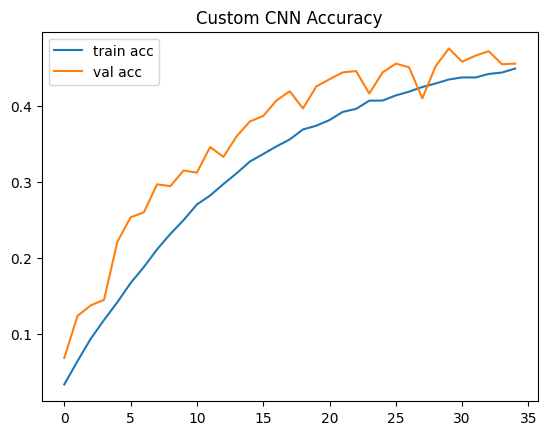

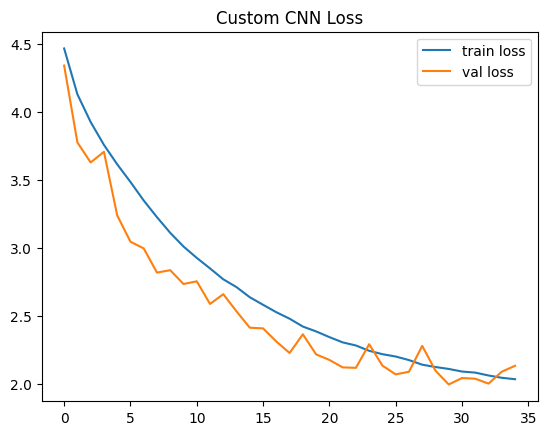

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Custom CNN Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Custom CNN Loss")
plt.legend()
plt.show()

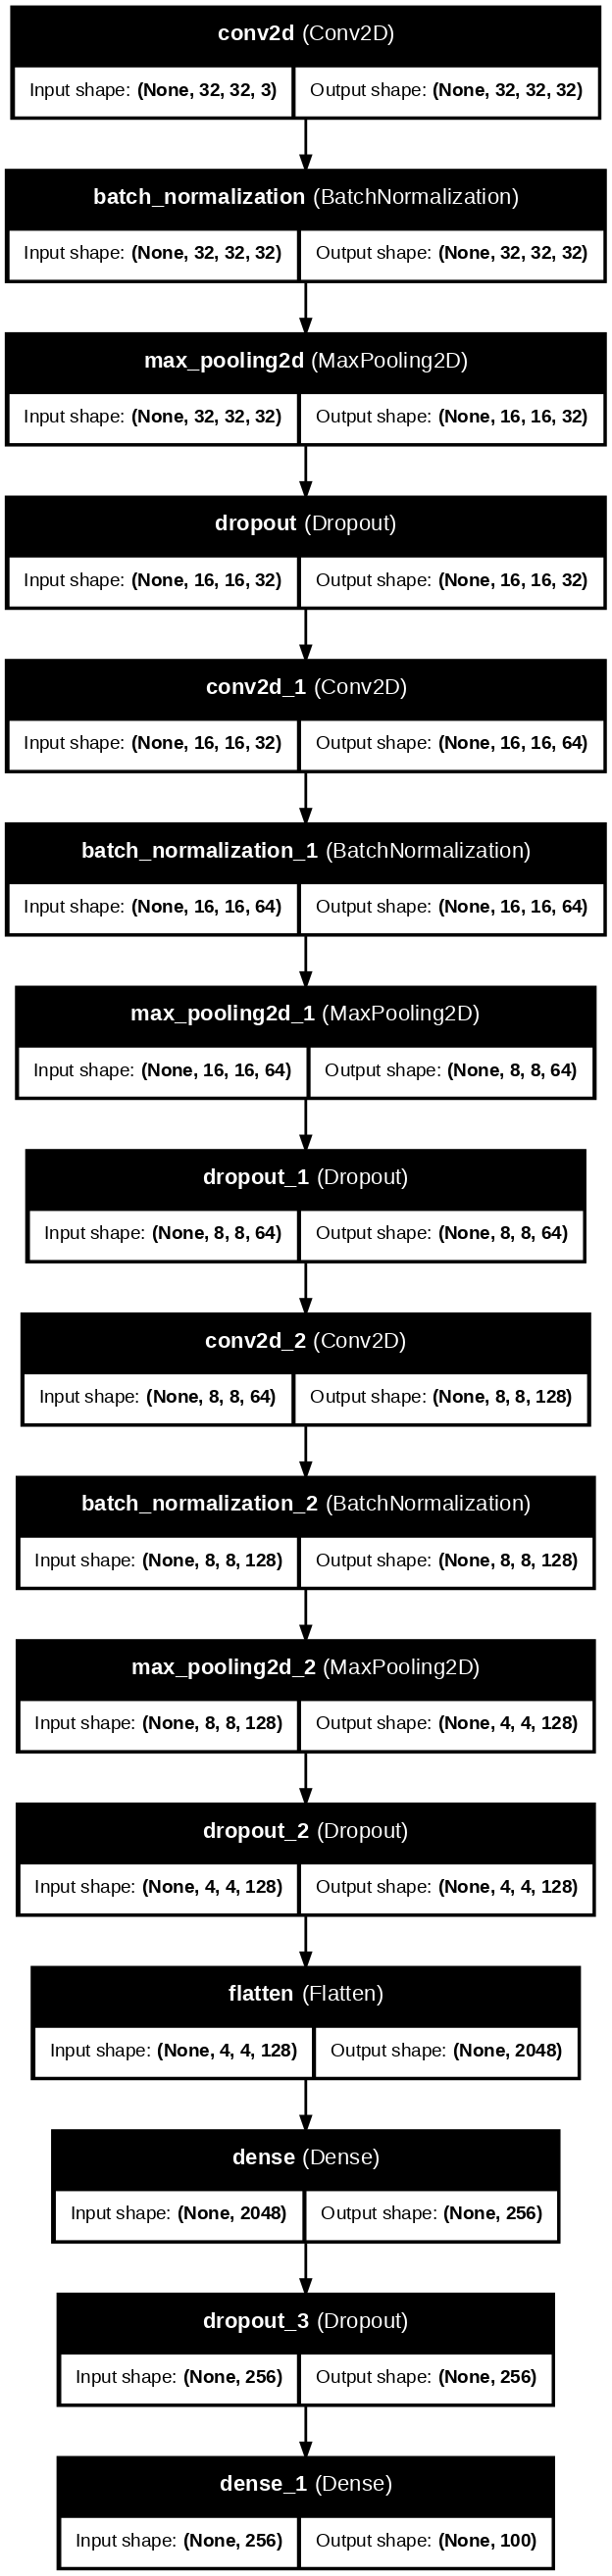

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True, dpi=100)

#Vgg Custom

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = 100
input_shape = (32, 32, 3)

def build_vgg16_cifar(input_shape=(32,32,3), num_classes=100):
    model = Sequential(name="VGG16_custom")

    # Block 1: 64,64 + pool
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 2: 128,128 + pool
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 3: 256,256,256 + pool
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 4: 512,512,512 + pool
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 5: 512,512,512 + pool
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Classifier (VGG: Flatten -> 4096 -> 4096 -> num_classes)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [ ]:
vgg16_custom = build_vgg16_cifar(input_shape, num_classes)
vgg16_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ckpt = ModelCheckpoint("best_vgg16_custom.h5", monitor='val_accuracy', save_best_only=True)

In [ ]:
history_vgg_custom = vgg16_custom.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, ckpt],
    verbose=1
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0102 - loss: 4.6281

625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.0102 - loss: 4.6280 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.0101 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.0103 - loss: 4.6053 - val_accuracy: 0.0100 - val_loss: 4.6053
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.0099 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6053
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.0118 - loss: 4.6051 - val_accuracy: 0.0100 - val_loss: 4.6053
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.0095 - loss: 4.6053 - val_accuracy: 0.0100 - val_loss: 4.6053


In [ ]:
test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(x_test, y_test, verbose=2)
print(f"Custom VGG16 Test Accuracy: {test_acc_vggc:.4f}")

313/313 - 3s - 8ms/step - accuracy: 0.0100 - loss: 4.6052
Custom VGG16 Test Accuracy: 0.0100


In [ ]:
vgg16_custom.summary()

Model: "VGG16_custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │       409,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,020,846 (389.18 MB)

 Trainable params: 34,006,948 (129.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,013,898 (259.45 MB)

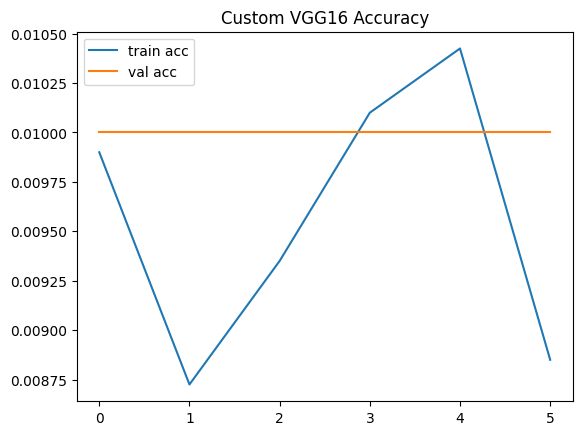

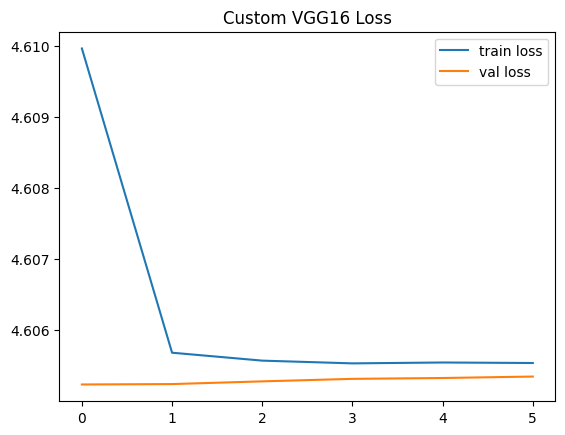

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history_vgg_custom.history['accuracy'], label='train acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='val acc')
plt.title("Custom VGG16 Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history_vgg_custom.history['loss'], label='train loss')
plt.plot(history_vgg_custom.history['val_loss'], label='val loss')
plt.title("Custom VGG16 Loss")
plt.legend()
plt.show()

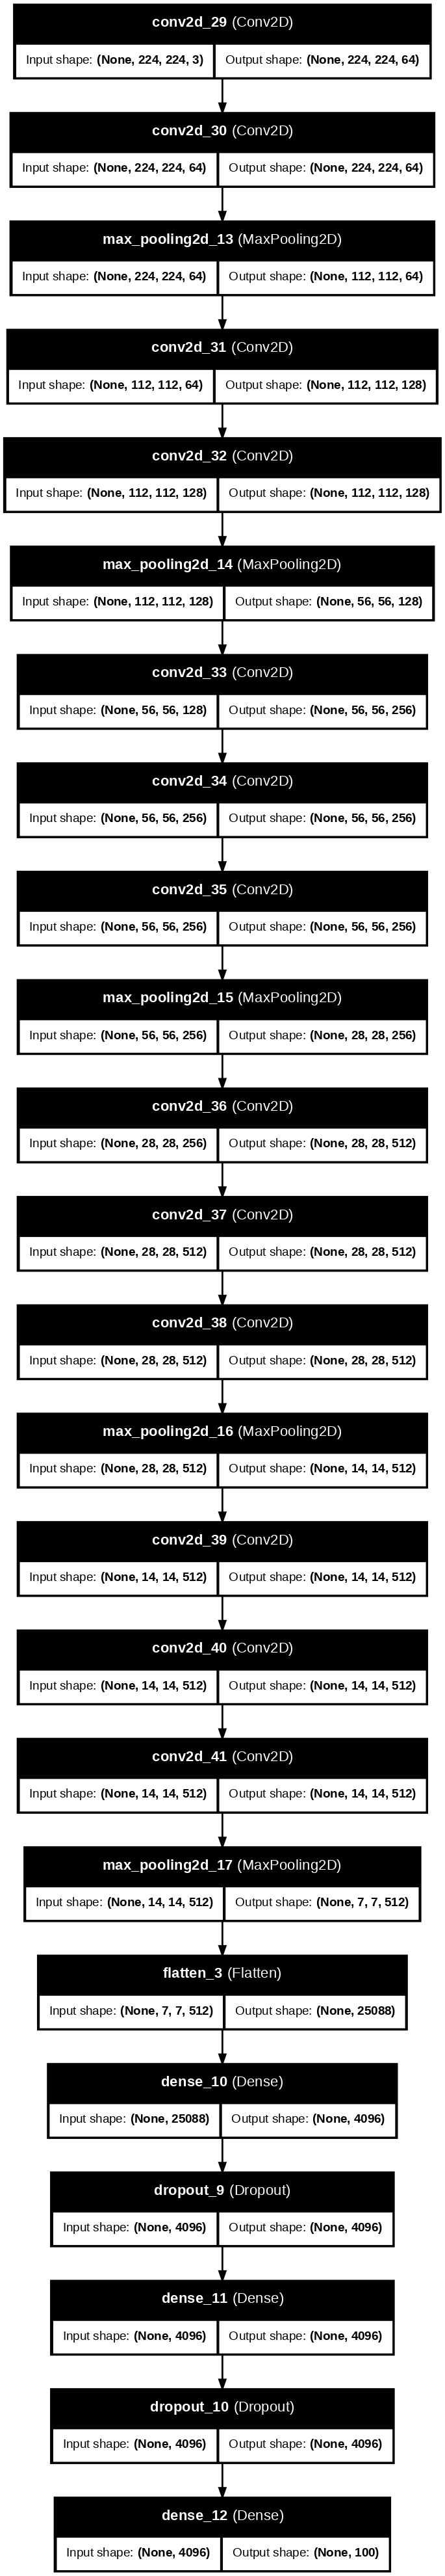

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_vgg_custom, to_file="model_vgg.png", show_shapes=True, show_layer_names=True, dpi=100)

In [ ]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16 (Custom Built)"],
    "Test Accuracy": [test_acc, test_acc_vggc]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Model  Test Accuracy
0            Custom CNN         0.4693
1  VGG16 (Custom Built)         0.0100


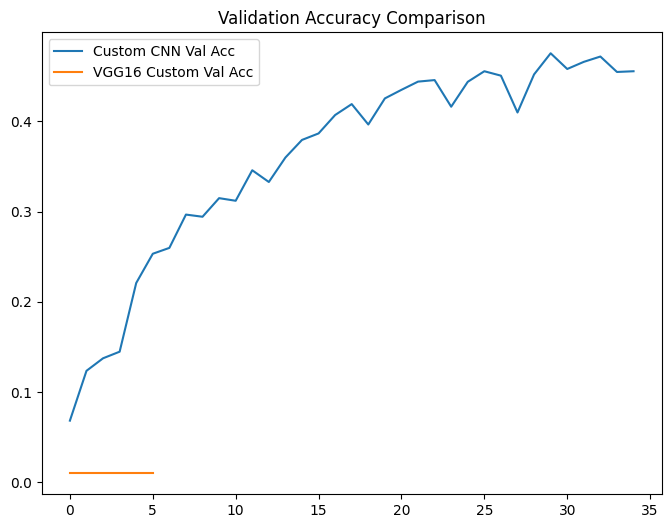

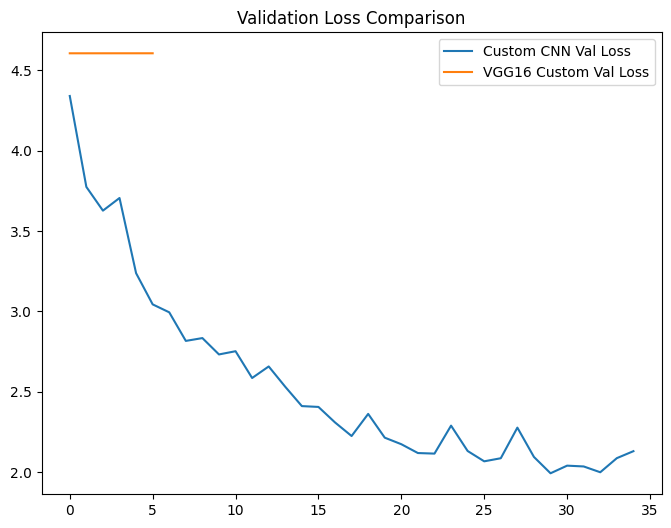

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='VGG16 Custom Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg_custom.history['val_loss'], label='VGG16 Custom Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()